In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load data
df=pd.read_csv('Transactions1.csv')


In [37]:
# Convert t_date to datetime
df['t_date'] = pd.to_datetime(df['t_date'], format='%m-%d-%Y', errors='coerce')

# Strip whitespace from string columns
string_cols = ['city', 'state', 'services', 'products_used', 't_details']
for col in string_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
# t_amt to numeric
df['t_amt']=pd.to_numeric(df['t_amt'],errors='coerce')
# Add month column for temporal analysis
df['month']=df['t_date'].dt.to_period('M')

df.head()

,t_date,cust_id,t_amt,services,products_used,city,state,t_details,month
0,2015-06-26,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit,2015-06
1,2015-05-26,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit,2015-05
2,2015-06-01,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit,2015-06
3,2015-06-05,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit,2015-06
4,2015-12-17,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit,2015-12


### 1. What is the total sales amount across all transactions?


In [38]:
print(df['t_amt'].sum())

5110820.54


### 2. Which month had the highest total transaction amount?


In [39]:
monthly_sales=df.groupby('month')['t_amt'].sum()
print("Month:",monthly_sales.idxmax(),"\nAmount:",monthly_sales.max())

Month: 2015-03 
Amount: 444664.24


### 3. What is the average transaction amount per customer?


In [40]:
avg_spend_per_cust = df.groupby('cust_id')['t_amt'].mean()
print(avg_spend_per_cust.mean())

101.97791991921538


### 4. What is the trend of total sales over months?


Monthly sales trend


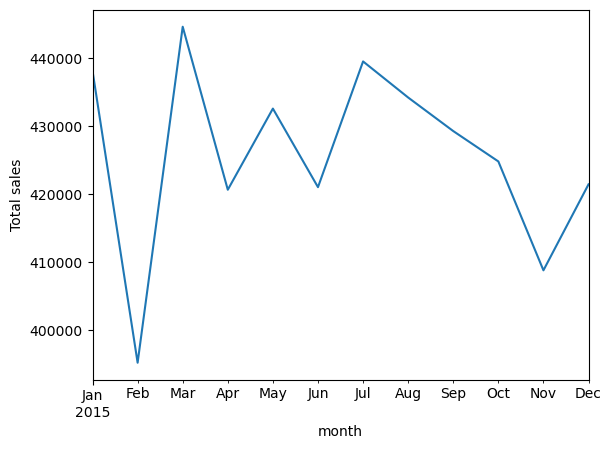

In [41]:
print("Monthly sales trend")
monthly_sales.plot()
plt.ylabel('Total sales')
plt.show()

### 5. What is the highest single transaction amount recorded?


In [42]:
print(df['t_amt'].max())

200.0


### 6. Which service category contributes the most to total revenue?


In [43]:
service_revenue=df.groupby('services')['t_amt'].sum()
print("Top service:",service_revenue.idxmax(),"\nAmount",service_revenue.max())

Top service: Outdoor Recreation 
Amount 846678.64


### 7. Which product generated the highest revenue?


In [44]:
product_revenue = df.groupby('products_used')['t_amt'].sum()
print("Top revenue product:",product_revenue.idxmax())

Top revenue product: Yoga & Pilates


### 8. How does the average transaction amount vary between services?


In [45]:
avg_txn_by_service = df.groupby('services')['t_amt'].mean().sort_values(ascending=False)
print("Average Transaction Amount by Service:")
print(avg_txn_by_service)

Average Transaction Amount by Service:
services
Exercise & Fitness        103.660247
Racquet Sports            103.647461
Air Sports                103.455104
Indoor Games              103.074684
Dancing                   102.907512
Team Sports               102.738998
Gymnastics                102.385901
Games                     102.272968
Jumping                   102.155171
Water Sports              101.899975
Outdoor Play Equipment    101.281196
Winter Sports             101.217718
Combat Sports             101.061761
Outdoor Recreation        100.999480
Puzzles                   100.595997
Name: t_amt, dtype: float64


### 9. How many unique customers made purchases?


In [46]:
print("Unique Customers:",df['cust_id'].nunique())

Unique Customers: 9926


### 10. Which customers have spent the most overall?


In [47]:
top_spenders=df.groupby('cust_id')['t_amt'].sum().sort_values(ascending=False).head(5)
print(top_spenders)

cust_id
4009485    1973.30
4006425    1732.09
4000221    1671.47
4003228    1640.63
4006606    1628.94
Name: t_amt, dtype: float64


### 11. What is the average number of transactions per customer?


In [48]:
avg_txns=df['cust_id'].value_counts().mean()
print(avg_txns)

5.037275841225066


### 12. Are there customers who made multiple purchases in different categories?


In [49]:
cust_cats = df.groupby('cust_id')['services'].nunique()
multi_cat_custs = cust_cats[cust_cats > 1].count()
multi_cat_custs

9488

### 13. What percentage of customers are repeat buyers?


In [50]:
cust_counts=df['cust_id'].value_counts()
repeat_buyers=cust_counts[cust_counts>1].count()
total_customers = df['cust_id'].nunique()
pct_repeat = (repeat_buyers / total_customers) * 100
print(pct_repeat)


96.5645778762845


### 15. Which services are most popular by transaction count?


In [51]:
pop_services = df['services'].value_counts()
print("Services by Transaction Count:",pop_services)



Services by Transaction Count: services
Outdoor Recreation        8383
Exercise & Fitness        7394
Team Sports               6010
Water Sports              5219
Games                     3666
Gymnastics                3196
Winter Sports             3181
Outdoor Play Equipment    2910
Indoor Games              2799
Jumping                   2015
Combat Sports             1630
Racquet Sports            1611
Air Sports                 960
Puzzles                    612
Dancing                    414
Name: count, dtype: int64


### 17. What is the average transaction amount per product type?


In [52]:
avg_txn_by_product = df.groupby('products_used')['t_amt'].mean().sort_values(ascending=False)
print("Top 10 Products by Avg Transaction Amount:")
print(avg_txn_by_product.head(10))

Top 10 Products by Avg Transaction Amount:
products_used
Beach Volleyball                     108.694116
Badminton                            108.441138
Exercise Balls                       107.999617
Yoga & Pilates                       107.668784
Trampoline Accessories               107.083559
Racquetball                          106.793646
Slides                               106.467073
Snowmobiling                         106.203974
Stopwatches                          106.070453
Weightlifting Machine Accessories    106.048750
Name: t_amt, dtype: float64


### 18. Are there specific services where customers spend significantly more?


In [53]:
print(avg_txn_by_service.head())

services
Exercise & Fitness    103.660247
Racquet Sports        103.647461
Air Sports            103.455104
Indoor Games          103.074684
Dancing               102.907512
Name: t_amt, dtype: float64


### 19. Which state has the highest total sales?


In [54]:
state_sales = df.groupby('state')['t_amt'].sum()
top_state = state_sales.idxmax()
print("State with Highest Total Sales: ",top_state,state_sales.max())


State with Highest Total Sales:  California 702346.23


### 20. Which city records the highest number of transactions?


In [55]:
top_city = df['city'].value_counts().idxmax()
print(f"City with Highest Number of Transactions: {top_city}")


City with Highest Number of Transactions: Pasadena


### 21. What is the average spending per transaction in each state?


In [66]:
avg_spend_state = df.groupby('state')['t_amt'].mean().sort_values(ascending=False)
print("Average Spending per Transaction by State (Top 5):")
print(avg_spend_state.head(5))

Average Spending per Transaction by State (Top 5):
state
Nevada           105.434718
Oklahoma         104.995771
Virginia         104.976206
Massachusetts    104.541571
Utah             104.507560
Name: t_amt, dtype: float64


### 23. Which states buy the most Outdoor Recreation products?



In [67]:
outdoor_rec = df[df['services'] == 'Outdoor Recreation']
top_outdoor_state = outdoor_rec.groupby('state')['t_amt'].sum().idxmax()
print(top_outdoor_state)

California


### 24. Compare average spending between California and Texas customers.


In [68]:
ca_avg = df[df['state'] == 'California']['t_amt'].mean()
tx_avg = df[df['state'] == 'Texas']['t_amt'].mean()
print(f"Average Spending: California ${ca_avg:.2f} vs Texas ${tx_avg:.2f}")


Average Spending: California $102.65 vs Texas $101.38


### 27. What is the total number of transactions per month?


In [69]:
monthly_txns = df.groupby('month').size()
print("Total Transactions per Month:")
print(monthly_txns)



Total Transactions per Month:
month
2015-01    4268
2015-02    3834
2015-03    4360
2015-04    4175
2015-05    4205
2015-06    4171
2015-07    4252
2015-08    4250
2015-09    4160
2015-10    4181
2015-11    3994
2015-12    4150
Freq: M, dtype: int64


### 28. Is there a particular season when sports equipment sales spike?


Monthly Sales for Sports Categories:
month
2015-01    139291.20
2015-02    125268.51
2015-03    146115.70
2015-04    135702.70
2015-05    139019.59
2015-06    135747.90
2015-07    139196.38
2015-08    143497.04
2015-09    137780.19
2015-10    131578.51
2015-11    126284.89
2015-12    136498.97
Freq: M, Name: t_amt, dtype: float64


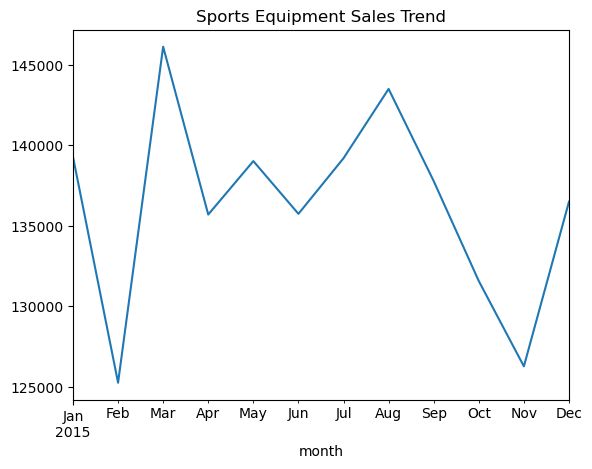

Peak Month for Sports: 2015-03


In [70]:

sports_cats = ['Team Sports', 'Winter Sports', 'Water Sports', 'Combat Sports']
sports_df = df[df['services'].isin(sports_cats)]
sports_monthly = sports_df.groupby('month')['t_amt'].sum()
print("Monthly Sales for Sports Categories:")
print(sports_monthly)
sports_monthly.plot(title='Sports Equipment Sales Trend')
plt.show()
print(f"Peak Month for Sports: {sports_monthly.idxmax()}")


### 29. How many transactions were done using credit?


In [71]:
credit_txns = df[df['t_details'] == 'credit'].shape[0]
print(credit_txns)

43151


### 30. What is the total revenue generated from credit transactions?


In [72]:
credit_revenue = df[df['t_details'] == 'credit']['t_amt'].sum()
print(credit_revenue)


4923134.930000001


### 31. Is there a difference in average spending between credit and debit customers?


In [73]:
avg_credit = df[df['t_details'] == 'credit']['t_amt'].mean()
avg_cash_debit = df[df['t_details'] != 'credit']['t_amt'].mean()
print(avg_credit,"vs",avg_cash_debit)

114.09086533336425 vs 27.403359614542268


### 35. Are there underperforming service categories that need promotional offers?



In [74]:
underperforming = service_revenue.sort_values().head(5)
print("Bottom 5 Services by Total Revenue:")
print(underperforming)


Bottom 5 Services by Total Revenue:
services
Dancing            42603.71
Puzzles            61564.75
Air Sports         99316.90
Combat Sports     164730.67
Racquet Sports    166976.06
Name: t_amt, dtype: float64
